<a href="https://colab.research.google.com/github/turnbulla/sit742-1/blob/master/Copy_of_2020SIT742Task2Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs:  
- Group ID:  
- Emails:   

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [58]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [60]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

df = spark.read.format('csv').options(header='true', inferSchema=True).load("2020T2Data.csv")

df.show()

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [61]:
from pyspark.sql import functions as F


df.agg(F.avg(F.col("Age")), F.min(F.col("Age")), F.max(F.col("Age"))).show()


+------------------+--------+--------+
|          avg(Age)|min(Age)|max(Age)|
+------------------+--------+--------+
|25.122205745043114|      16|      45|
+------------------+--------+--------+



In [62]:
df.agg(F.min(F.col("Overall")), F.avg(F.col("Overall")), F.max(F.col("Overall"))).show()

+------------+-----------------+------------+
|min(Overall)|     avg(Overall)|max(Overall)|
+------------+-----------------+------------+
|          46|66.23869940132916|          94|
+------------+-----------------+------------+



In [63]:
df.groupby("Position").agg(F.avg(F.col("Overall"))).sort("avg(Overall)", ascending = False).show(1)




+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
+--------+-----------------+
only showing top 1 row



In [64]:
df.groupby("Nationality").agg(F.avg(F.col("Overall"))).sort("avg(Overall)", ascending = False).show(3)




+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [65]:
#Your code for the results on Avg Potentials on Country by Position with ordering the results on country by alphabet (show top 10)
df3 = df.groupby("Nationality","Position").agg(F.avg(F.col("Potential"))).orderBy(["avg(Potential)", "Nationality"], ascending = [False,True])

df3_filtered = df3.show(10)


#Need to amend code to sort by Nationality






+--------------------+--------+-----------------+
|         Nationality|Position|   avg(Potential)|
+--------------------+--------+-----------------+
|              Poland|      CF|             88.0|
|           Argentina|      RF|             87.0|
|            Slovakia|     LCM|             87.0|
|             Belgium|      LF|             86.0|
|             Morocco|     RAM|             86.0|
|              Russia|     LDM|             86.0|
|              Serbia|      LS|             86.0|
|               Wales|     LDM|             86.0|
|             Croatia|     LCM|85.33333333333333|
|Central African Rep.|      CM|             85.0|
+--------------------+--------+-----------------+
only showing top 10 rows



In [66]:
#Your Code to identify the position having highest Avg Potential for Australia

df.filter(df.Nationality == 'Australia').groupby("Position").agg(F.avg(F.col("Potential"))).orderBy("avg(Potential)", ascending = False).show(1)


+--------+--------------+
|Position|avg(Potential)|
+--------+--------------+
|     RDM|          77.0|
+--------+--------------+
only showing top 1 row



Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd







## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [68]:
# Your code to select relevant features and filter the data by removing the GK

df_filtered = df.filter(df.Position != 'GK')

df2 = df_filtered.select('ID','Position','Height(CM)', 'Weight(KG)', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')

df2.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [69]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF = {'LB', 'LWB', 'RB', 'LCB', 'RCB', 'CB', 'RWB'}
FWD = {'RF', 'LF', 'LW', 'RS', 'RW', 'LS', 'CF', 'ST'}
MID = {'LCM', 'LM', 'RDM', 'CAM', 'RAM','RCM', 'CM', 'CDM', 'RM', 'LAM', 'LDM'}



# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..


df_kmeans_new = df2.withColumn('Position_Group', when(col("Position").isin(DEF), "DEF").when(col("Position").isin(FWD), "FWD").when(col("Position").isin(MID), "MID").otherwise(0))

df_kmeans_new.show()



+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [70]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

# Set columns to float values (numeric) for Vec Assembler to vectorize
for i in df_kmeans_new.columns:
    if i in FEATURES_COL:
        df_kmeans_new = df_kmeans_new.withColumn(
            i, df_kmeans_new[i].cast('float'))

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.735992431640...|
| 20801|[188.975997924804...|
|190871|[179.832000732421...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.ml.feature import StandardScaler

cost = np.zeros(20)

# Your code

for k in range(2, 20):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_kmeans_)
    cost[k] = model.computeCost(df_kmeans_)


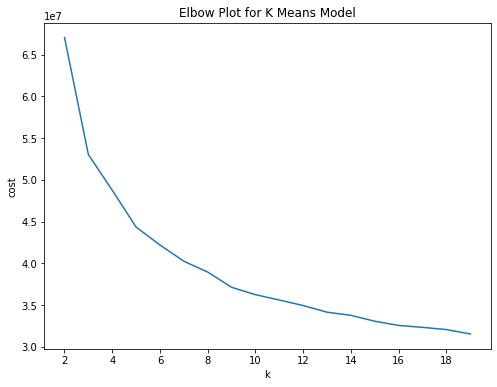

In [84]:
from matplotlib.ticker import MaxNLocator

# Elbow Plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.set_title('Elbow Plot for K Means Model')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()




### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
k = 8

kmeans2 = KMeans().setK(8).setSeed(1)
model2 = kmeans2.fit(df_kmeans_)


In [96]:
from pyspark.sql import SQLContext
cluster = model2.transform(df_kmeans_)
cluster.show()

df_kmeans_pred_ = df_kmeans_new.join(cluster, on=['ID'], how='left').withColumnRenamed('Prediction', 'Cluster')

df_kmeans_pred_.show()


+------+--------------------+--------------------+----------+
|    ID|            features|     Scaled_features|prediction|
+------+--------------------+--------------------+----------+
|158023|[173.735992431640...|[12.9261366722264...|         2|
| 20801|[188.975997924804...|[14.0600087682323...|         2|
|190871|[179.832000732421...|[13.3796859647366...|         2|
|192985|[155.752807617187...|[11.5881692110224...|         4|
|183277|[176.783996582031...|[13.1529113184815...|         2|
|177003|[176.783996582031...|[13.1529113184815...|         4|
|176580|[182.880004882812...|[13.6064606109917...|         2|
|155862|[182.880004882812...|[13.6064606109917...|         4|
|188545|[182.880004882812...|[13.6064606109917...|         2|
|182521|[182.880004882812...|[13.6064606109917...|         4|
|182493|[188.975997924804...|[14.0600087682323...|         0|
|168542|[176.783996582031...|[13.1529113184815...|         2|
|215914|[170.688003540039...|[12.6993631612409...|         4|
|211110|

In [105]:
#summarize each cluster with the count on each Position_Group

df_kmeans_pred_.groupby(["Cluster","Position_Group"]).agg(F.count(F.col("Position_Group"))).sort("Cluster").show(50)

+-------+--------------+---------------------+
|Cluster|Position_Group|count(Position_Group)|
+-------+--------------+---------------------+
|      0|           MID|                  967|
|      0|           DEF|                 1230|
|      0|           FWD|                   11|
|      1|           FWD|                    2|
|      1|           MID|                  117|
|      1|           DEF|                 1462|
|      2|           FWD|                 1112|
|      2|           DEF|                    4|
|      2|           MID|                 1195|
|      3|           DEF|                 1266|
|      3|           MID|                   77|
|      3|           FWD|                    1|
|      4|           DEF|                  599|
|      4|           MID|                 1720|
|      4|           FWD|                   71|
|      5|           FWD|                  535|
|      5|           DEF|                    8|
|      5|           MID|                 1486|
|      6|    

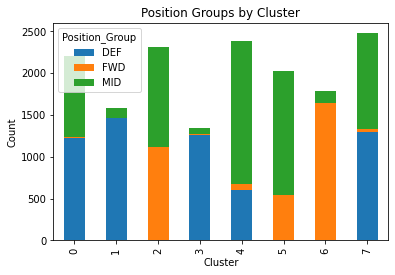

In [107]:
df_cluster_result = df_kmeans_pred_.toPandas().set_index('ID')

pd.crosstab(df_cluster_result['Cluster'],
            df_cluster_result['Position_Group']).plot.bar(stacked=True)
plt.title('Position Groups by Cluster')
plt.ylabel('Count')
plt.show()

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [110]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(3)


IllegalArgumentException: ignored

In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [109]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

NameError: ignored

In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)


****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
from sklearn.metrics import confusion_matrix


# Your Code


In [0]:
from sklearn.metrics import classification_report

# Your Code



### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Your code 


In [0]:
# Your code